In [1]:
pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from pycaret.datasets import get_data
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


# Experiment 1

In [6]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [7]:
s = setup(data, target = 'Savings', session_id = 123)

,Description,Value
0,session_id,123
1,Target,Savings
2,Original Data,"(505, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(353, 3)"


In [8]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1230.0322,2.611432e+06,1615.9924,0.8909,0.3590,0.2647
1,1258.9824,2.170857e+06,1473.3829,0.8928,0.1788,0.1270
2,1154.1564,1.973015e+06,1404.6404,0.9236,0.1561,0.1189
3,1360.2166,2.944236e+06,1715.8774,0.8689,1.4329,0.1246
4,996.2792,1.694019e+06,1301.5449,0.9330,0.2130,0.1371
5,952.0485,1.450000e+06,1204.1597,0.9364,0.1384,0.1084
6,1230.7446,2.280543e+06,1510.1467,0.8763,0.1639,0.1244
7,1163.0879,2.086828e+06,1444.5856,0.9251,0.1763,0.1288
8,1235.4550,2.349338e+06,1532.7552,0.8979,0.2121,0.1444


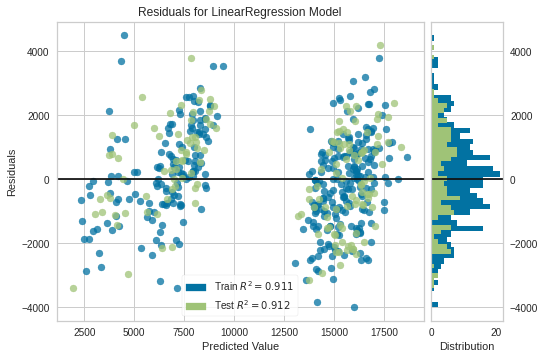

In [9]:
plot_model(lr)

# Experiment 2

In [10]:
s2 = setup(data, target = 'Savings', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['Age', 'Income'])

,Description,Value
0,session_id,123
1,Target,Savings
2,Original Data,"(505, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(353, 29)"


In [13]:
s2[0].columns

AttributeError: ignored

In [14]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1115.8413,2.204359e+06,1484.7083,0.9079,0.3800,0.2968
1,930.1339,1.503214e+06,1226.0563,0.9257,0.1831,0.1012
2,1056.8081,1.637331e+06,1279.5824,0.9366,0.1620,0.1165
3,953.5479,1.758689e+06,1326.1556,0.9217,1.4032,0.0805
4,889.4331,1.163076e+06,1078.4600,0.9540,0.1739,0.1170
5,899.7493,1.314544e+06,1146.5355,0.9424,0.1373,0.1047
6,1133.9426,1.897836e+06,1377.6195,0.8971,0.1411,0.1120
7,968.2768,1.451584e+06,1204.8173,0.9479,0.1311,0.1061
8,1094.6716,1.708099e+06,1306.9426,0.9257,0.1360,0.1101


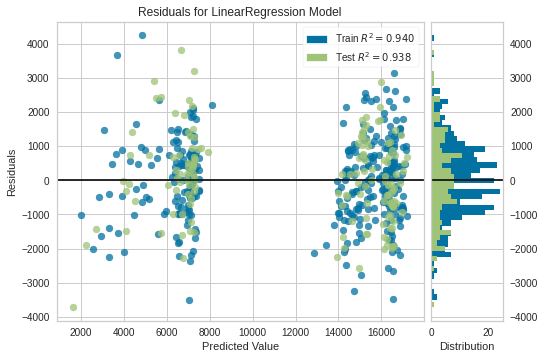

In [15]:
plot_model(lr)

In [16]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Savings',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              n_jobs=-1, random_state=123, subclass='binary',
                              target='Savings'

In [17]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [18]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Savings',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             n_jobs=-1, random_state=123, subclass='binary',
                             target='Savings',
               

In [22]:
import requests
url = 'https://pycaret-savings.herokuapp.com/predict_api'
pred = requests.post(url,json={'Age':55, 'Income':74373})
print(pred.json())

JSONDecodeError: ignored